Ï∞∏Í≥†ÏûêÎ£å 
- https://dacon.io/competitions/official/235862/codeshare/3902?page=1&dtype=recent
- https://dacon.io/competitions/official/235862/codeshare/4121?page=1&dtype=recent

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Îã§Ïö¥Î∞õÏùÄ csvÎ•º pandasÏùò DataFrame ÌòïÏãùÏúºÎ°ú Î∂àÎü¨ÏòµÎãàÎã§.
df_train = pd.read_csv('data/penguin/train.csv')
df_test = pd.read_csv('data/penguin/test.csv')

### train.csv : ÌïôÏäµ Îç∞Ïù¥ÌÑ∞
- id : ÏÉòÌîå ÏïÑÏù¥Îîî
- Species: Ìé≠Í∑ÑÏùò Ï¢ÖÏùÑ ÎÇòÌÉÄÎÇ¥Îäî Î¨∏ÏûêÏó¥
- Island : ÏÉòÌîåÎì§Ïù¥ ÏàòÏßëÎêú Palmer Station Í∑ºÏ≤ò ÏÑ¨ Ïù¥Î¶Ñ
- Clutch Completion : Í¥ÄÏ∞∞Îêú Ìé≠Í∑Ñ Îë•ÏßÄÏùò ÏïåÏù¥ 2Í∞úÏù∏ Í≤ΩÏö∞ Full ClutchÏù¥Î©∞ YesÎ°ú ÌëúÍ∏∞
- Culmen Length (mm) : Ìé≠Í∑Ñ ÏòÜÎ™®Ïäµ Í∏∞Ï§Ä Î∂ÄÎ¶¨Ïùò Í∞ÄÎ°ú Í∏∏Ïù¥
- Culmen Depth (mm) : Ìé≠Í∑Ñ ÏòÜÎ™®Ïäµ Í∏∞Ï§Ä Î∂ÄÎ¶¨Ïùò ÏÑ∏Î°ú Í∏∏Ïù¥
- Flipper Length (mm) : Ìé≠Í∑ÑÏùò Ìåî(ÎÇ†Í∞ú) Í∏∏Ïù¥
- Sex : Ìé≠Í∑ÑÏùò ÏÑ±Î≥Ñ
- Delta 15 N (o/oo)  : ÌÜ†ÏñëÏóê Îî∞Îùº Î≥ÄÌôîÌïòÎäî ÏïàÏ†ï ÎèôÏúÑÏõêÏÜå 15N:14NÏùò ÎπÑÏú®
- Delta 13 C (o/oo) : Î®πÏù¥Ïóê Îî∞Îùº Î≥ÄÌôîÌïòÎäî ÏïàÏ†ï ÎèôÏúÑÏõêÏÜå 13C:12CÏùò ÎπÑÏú®
- Body Mass (g): Ìé≠Í∑ÑÏùò Î™∏Î¨¥Í≤åÎ•º ÎÇòÌÉÄÎÇ¥Îäî Ïà´Ïûê (g)

In [2]:
df_train.shape, df_test.shape

((114, 11), (228, 10))

In [3]:
# id Îäî Ï†úÏô∏ÌïòÍ≥† Î∂ÑÏÑùÌï©ÎãàÎã§.
df_train = df_train.drop('id', axis=1)
df_test = df_test.drop('id', axis=1)

# Îç∞Ïù¥ÌÑ∞Î•º ÌôïÏù∏Ìï©ÎãàÎã§.
df_train.head()

Species  Island Clutch Completion  \
0          Gentoo penguin (Pygoscelis papua)  Biscoe               Yes   
1  Chinstrap penguin (Pygoscelis antarctica)   Dream                No   
2          Gentoo penguin (Pygoscelis papua)  Biscoe               Yes   
3          Gentoo penguin (Pygoscelis papua)  Biscoe               Yes   
4          Gentoo penguin (Pygoscelis papua)  Biscoe                No   

   Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)     Sex  \
0                50.0               15.3                  220    MALE   
1                49.5               19.0                  200    MALE   
2                45.1               14.4                  210  FEMALE   
3                44.5               14.7                  214  FEMALE   
4                49.6               16.0                  225    MALE   

   Delta 15 N (o/oo)  Delta 13 C (o/oo)  Body Mass (g)  
0            8.30515          -25.19017           5550  
1            9.63074          -24.34684           3800  
2            8.51951          -27.01854           4400  
3            8.20106          -26.16524           4850  
4            8.38324          -26.84272           5700

In [4]:
# Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏ 
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              114 non-null    object 
 1   Island               114 non-null    object 
 2   Clutch Completion    114 non-null    object 
 3   Culmen Length (mm)   114 non-null    float64
 4   Culmen Depth (mm)    114 non-null    float64
 5   Flipper Length (mm)  114 non-null    int64  
 6   Sex                  111 non-null    object 
 7   Delta 15 N (o/oo)    111 non-null    float64
 8   Delta 13 C (o/oo)    111 non-null    float64
 9   Body Mass (g)        114 non-null    int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 9.0+ KB


### Í≤∞Ï∏°Ïπò ÌôïÏù∏

In [5]:
# Í≤∞Ï∏°Ïπò ÌôïÏù∏ÌïòÍ∏∞ 
df_train.isnull().sum()

Species                0
Island                 0
Clutch Completion      0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Sex                    3
Delta 15 N (o/oo)      3
Delta 13 C (o/oo)      3
Body Mass (g)          0
dtype: int64

In [6]:
df_test.isnull().sum()

Species                0
Island                 0
Clutch Completion      0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Sex                    6
Delta 15 N (o/oo)      9
Delta 13 C (o/oo)      8
dtype: int64

In [7]:
# Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî rowÎì§ÏùÑ ÌôïÏù∏Ìï©ÎãàÎã§.
df_train[df_train.isna().sum(axis=1) > 0]

Species     Island Clutch Completion  \
6    Adelie Penguin (Pygoscelis adeliae)  Torgersen               Yes   
8    Adelie Penguin (Pygoscelis adeliae)  Torgersen               Yes   
18   Adelie Penguin (Pygoscelis adeliae)      Dream                No   
70     Gentoo penguin (Pygoscelis papua)     Biscoe               Yes   
109  Adelie Penguin (Pygoscelis adeliae)  Torgersen               Yes   

     Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)     Sex  \
6                  42.0               20.2                  190     NaN   
8                  34.1               18.1                  193     NaN   
18                 39.8               19.1                  184    MALE   
70                 46.2               14.4                  214     NaN   
109                36.6               17.8                  185  FEMALE   

     Delta 15 N (o/oo)  Delta 13 C (o/oo)  Body Mass (g)  
6              9.13362          -25.09368           4250  
8                  NaN                NaN           3475  
18                 NaN                NaN           4650  
70             8.24253          -26.81540           4650  
109                NaN                NaN           3700

In [8]:
# Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî rowÎì§ÏùÑ ÌôïÏù∏Ìï©ÎãàÎã§.
df_test[df_test.isna().sum(axis=1) > 0]

Species     Island Clutch Completion  \
27         Adelie Penguin (Pygoscelis adeliae)  Torgersen               Yes   
46         Adelie Penguin (Pygoscelis adeliae)  Torgersen               Yes   
75   Chinstrap penguin (Pygoscelis antarctica)      Dream               Yes   
81         Adelie Penguin (Pygoscelis adeliae)      Dream               Yes   
98           Gentoo penguin (Pygoscelis papua)     Biscoe               Yes   
106          Gentoo penguin (Pygoscelis papua)     Biscoe               Yes   
152          Gentoo penguin (Pygoscelis papua)     Biscoe               Yes   
159        Adelie Penguin (Pygoscelis adeliae)  Torgersen               Yes   
175        Adelie Penguin (Pygoscelis adeliae)      Dream               Yes   
202        Adelie Penguin (Pygoscelis adeliae)  Torgersen               Yes   
205        Adelie Penguin (Pygoscelis adeliae)  Torgersen               Yes   
209          Gentoo penguin (Pygoscelis papua)     Biscoe               Yes   
215        Adelie Penguin (Pygoscelis adeliae)      Dream               Yes   

     Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)     Sex  \
27                 38.6               21.2                  191    MALE   
46                 37.8               17.1                  186     NaN   
75                 51.9               19.5                  206    MALE   
81                 37.5               18.9                  179     NaN   
98                 47.3               13.8                  216     NaN   
106                47.3               15.3                  222    MALE   
152                44.5               15.7                  217     NaN   
159                41.1               17.6                  182  FEMALE   
175                40.8               18.4                  195    MALE   
202                39.1               18.7                  181    MALE   
205                37.8               17.3                  180     NaN   
209                44.5               14.3                  216     NaN   
215                41.1               19.0                  182    MALE   

     Delta 15 N (o/oo)  Delta 13 C (o/oo)  
27                 NaN                NaN  
46             8.63243          -25.21315  
75                 NaN          -23.78767  
81                 NaN                NaN  
98             8.25818          -26.23886  
106                NaN                NaN  
152            8.04111          -26.18444  
159                NaN                NaN  
175                NaN                NaN  
202                NaN                NaN  
205                NaN                NaN  
209            7.96621          -25.69327  
215                NaN                NaN

### Í∏∞Ï¥à ÌÜµÍ≥Ñ Î∂ÑÏÑù

In [9]:
# Í∏∞Ï¥à ÌÜµÍ≥ÑÎüâ ÌôïÏù∏ 
df_train.describe()

Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  \
count          114.000000         114.000000           114.000000   
mean            44.613158          17.014912           203.052632   
std              5.321829           1.941363            14.653425   
min             33.500000          13.200000           174.000000   
25%             40.325000          15.225000           190.000000   
50%             45.200000          17.250000           199.000000   
75%             49.075000          18.600000           216.000000   
max             55.100000          21.100000           231.000000   

       Delta 15 N (o/oo)  Delta 13 C (o/oo)  Body Mass (g)  
count         111.000000         111.000000     114.000000  
mean            8.737634         -25.723051    4327.850877  
std             0.567698           0.859786     781.766484  
min             7.632200         -27.018540    2700.000000  
25%             8.272585         -26.434025    3675.000000  
50%             8.632590         -25.955410    4250.000000  
75%             9.264635         -25.005945    4850.000000  
max            10.025440         -24.102550    6300.000000

In [10]:
# Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ ÌôïÏù∏ 
df_train.dtypes

Species                 object
Island                  object
Clutch Completion       object
Culmen Length (mm)     float64
Culmen Depth (mm)      float64
Flipper Length (mm)      int64
Sex                     object
Delta 15 N (o/oo)      float64
Delta 13 C (o/oo)      float64
Body Mass (g)            int64
dtype: object

In [11]:
# Î≤îÏ£ºÌòï ,Ïó∞ÏÜçÌòï Îç∞Ïù¥ÌÑ∞ ÎÇòÎà†Ï£ºÍ∏∞ 

categorical_feature = ['Species','Island','Clutch Completion','Sex']
numerical_feature= ['Culmen Depth (mm)','Culmen Length (mm)','Flipper Length (mm)','Delta 15 N (o/oo)','Delta 13 C (o/oo)']

### ÏàòÏπòÌòï Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî 

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

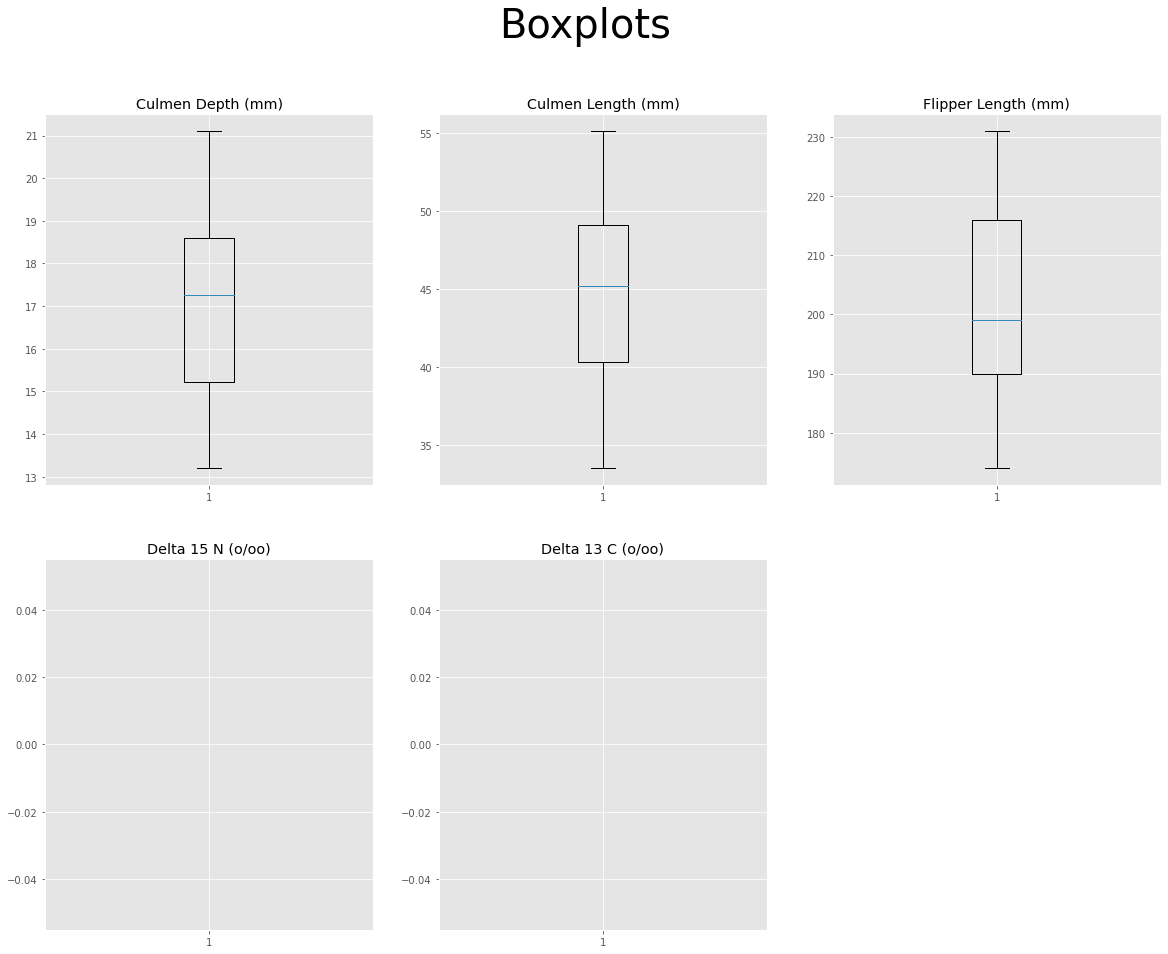

In [13]:
feature = numerical_feature

# Boxplot ÏùÑ ÏÇ¨Ïö©Ìï¥ÏÑú Îç∞Ïù¥ÌÑ∞Ïùò Î∂ÑÌè¨Î•º ÏÇ¥Ìé¥Î¥ÖÎãàÎã§.
plt.figure(figsize=(20,15))
plt.suptitle("Boxplots", fontsize=40)

for i in range(len(feature)):
    plt.subplot(2,3,i+1)
    plt.title(feature[i])
    plt.boxplot(df_train[feature[i]])
plt.show()

# ÌäπÏù¥ÏÇ¨Ìï≠Ïù¥ ÏóÜÏùå 

Culmen Depth (mm)


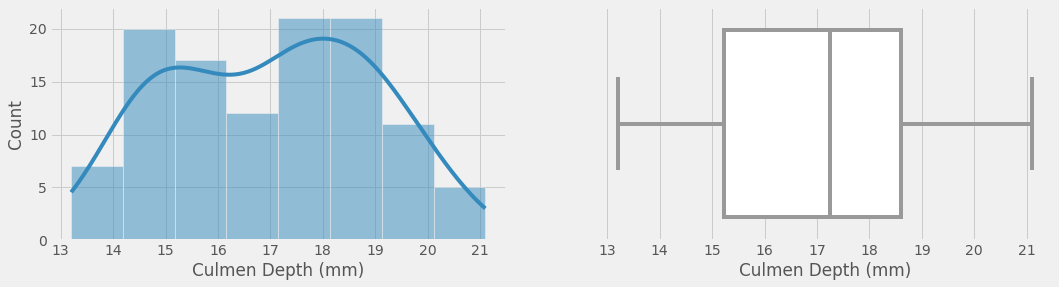

<Figure size 1080x360 with 0 Axes>

Culmen Length (mm)


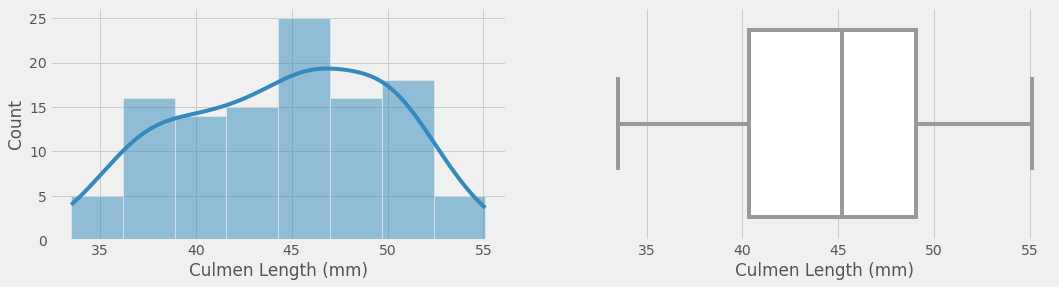

<Figure size 1080x360 with 0 Axes>

Flipper Length (mm)


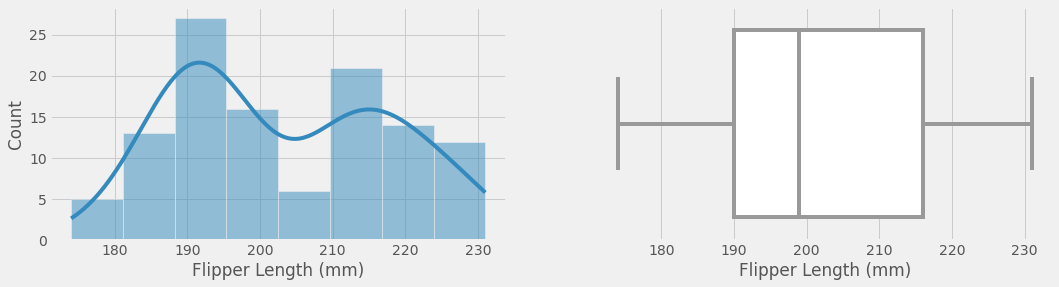

<Figure size 1080x360 with 0 Axes>

Delta 15 N (o/oo)


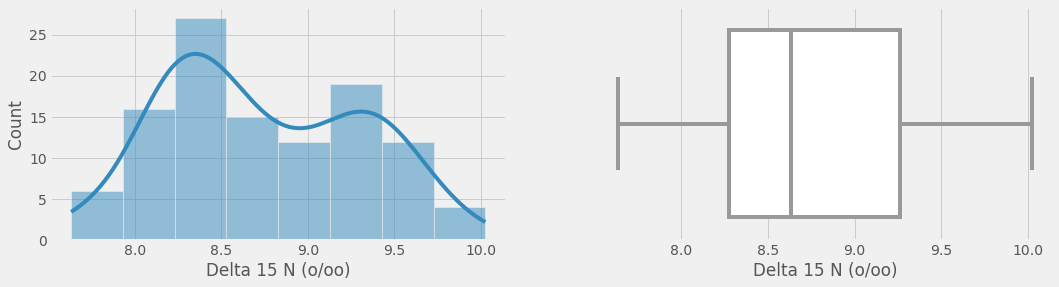

<Figure size 1080x360 with 0 Axes>

Delta 13 C (o/oo)


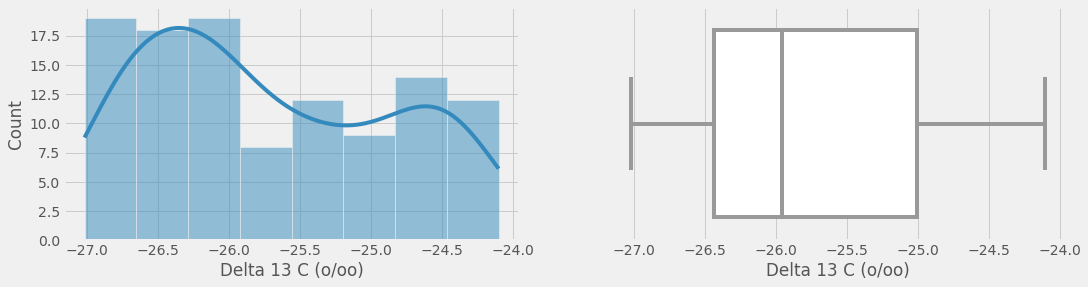

<Figure size 1080x360 with 0 Axes>

In [14]:
plt.style.use('fivethirtyeight')

for _ in numerical_feature:
    print(_)
    f,ax = plt.subplots(1,2,figsize=(16,4))
    plt.figure(figsize=(15,5))
    sns.histplot(x=df_train[_], ax=ax[0], kde=True)
    sns.boxplot(x=df_train[_], ax=ax[1], color='white')
    plt.show()

Body Mass (g)


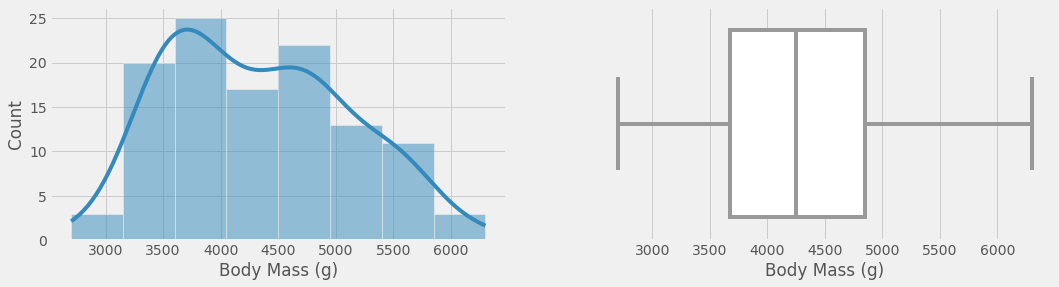

<Figure size 1080x360 with 0 Axes>

In [15]:
# target Î∂ÑÌè¨ ÌôïÏù∏ 

plt.style.use('fivethirtyeight')

print("Body Mass (g)")
f,ax = plt.subplots(1,2,figsize=(16,4))
plt.figure(figsize=(15,5))
sns.histplot(x=df_train['Body Mass (g)'], ax=ax[0], kde=True)
sns.boxplot(x=df_train['Body Mass (g)'], ax=ax[1], color='white')
plt.show()

### Ïπ¥ÌÖåÍ≥†Î¶¨Ìòï Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî

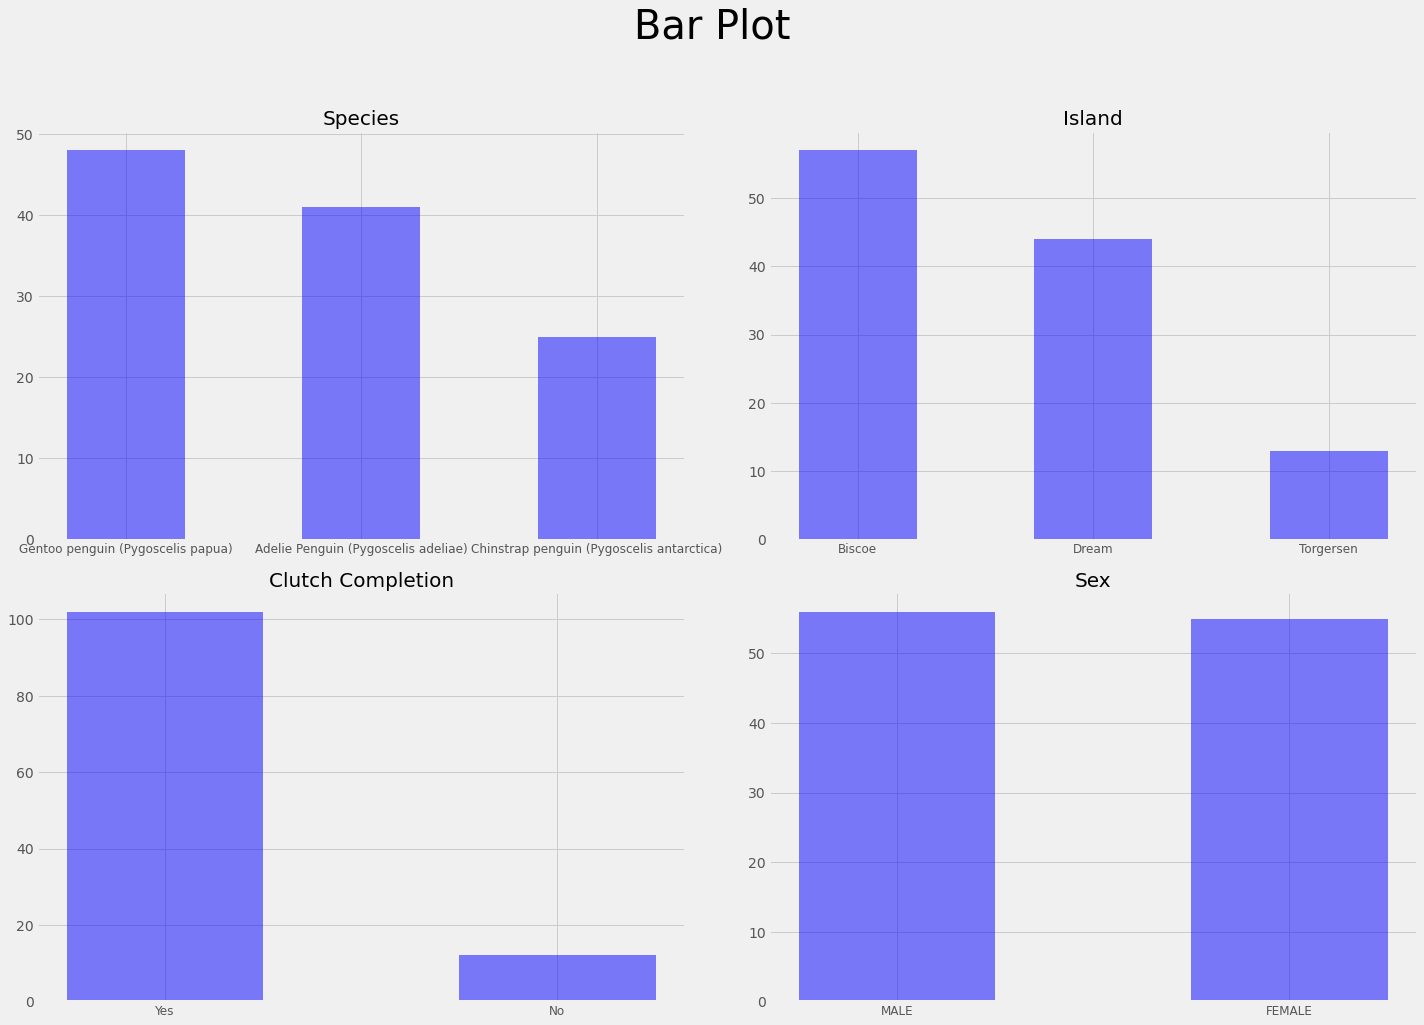

In [16]:
# ÌûàÏä§ÌÜ†Í∑∏Îû® ÏùÑ ÏÇ¨Ïö©Ìï¥ÏÑú Îç∞Ïù¥ÌÑ∞Ïùò Î∂ÑÌè¨Î•º ÏÇ¥Ìé¥Î¥ÖÎãàÎã§.
feature = categorical_feature

plt.figure(figsize=(20,15))
plt.suptitle("Bar Plot", fontsize=40)

for i in range(len(feature)):
    plt.subplot(2,2,i+1)
    plt.title(feature[i], fontsize=20)
    temp = df_train[feature[i]].value_counts()
    plt.bar(temp.keys(), temp.values, width=0.5, color='b', alpha=0.5)
    plt.xticks(temp.keys(), fontsize=12)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# ÏãúÍ∞ÅÌôî Í≤∞Í≥ºÎ∂ÑÏÑù üêß
# Species : Gentoo penguinÏù¥ Í∞ÄÏû• ÎßéÏùå
# Island : BiscoreÍ∞Ä Í∞ÄÏû• ÎßéÏùå
# Clutch Completetion : YesÍ∞Ä ÎßéÏùå (= data imbalanceÍ∞Ä Ïã¨Ìï®)
# Sex : Îëê Ïπ¥ÌÖåÍ≥†Î¶¨ Î™®Îëê ÎèôÏùºÌïú ÎπÑÏú®ÏùÑ Î≥¥ÏûÑ

Species
Gentoo penguin (Pygoscelis papua)            48
Adelie Penguin (Pygoscelis adeliae)          41
Chinstrap penguin (Pygoscelis antarctica)    25
Name: Species, dtype: int64


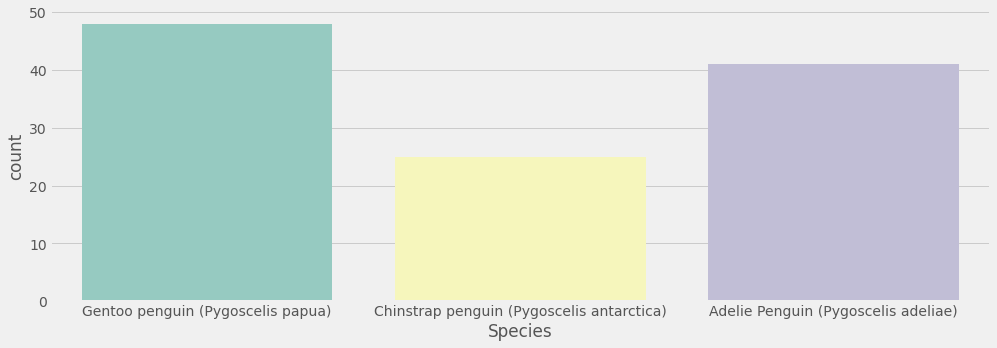

Island
Biscoe       57
Dream        44
Torgersen    13
Name: Island, dtype: int64


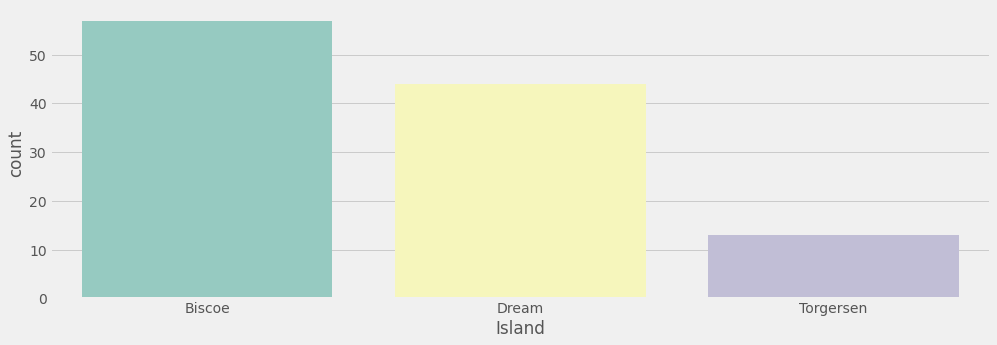

Clutch Completion
Yes    102
No      12
Name: Clutch Completion, dtype: int64


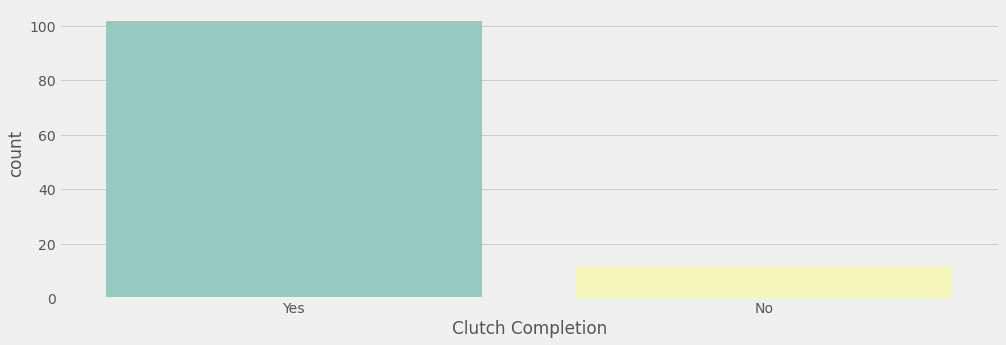

Sex
MALE      56
FEMALE    55
Name: Sex, dtype: int64


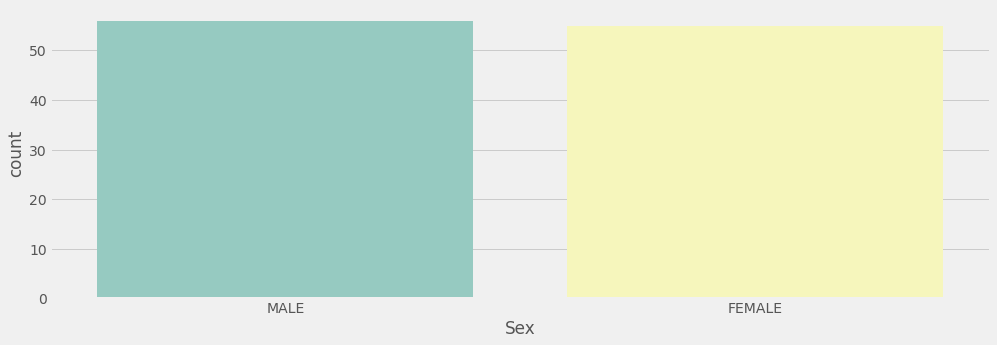

In [17]:
# Ïπ¥ÌÖåÍ≥†Î¶¨Ìòï Î≤îÏ£º ÌïòÎÇòÏî© 
for _ in categorical_feature:
    print(_)
    print(df_train[_].value_counts())
    plt.figure(figsize=(15,5))
    sns.countplot(x=df_train[_],palette='Set3')
    plt.show()

### ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÏãúÍ∞ÅÌôî

In [18]:
# Î®ºÏ†Ä ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞ÏùÑ ÏúÑÌï¥ ÌÖçÏä§Ìä∏ ÌòïÏãùÏùò Îç∞Ïù¥ÌÑ∞Î•º Ïà´ÏûêÎ°ú Î≥ÄÌôòÌï¥Ï§çÎãàÎã§.
from sklearn.preprocessing import LabelEncoder

corr_df = df_train.copy()
corr_df[corr_df.columns[corr_df.dtypes=='O']] = corr_df[corr_df.columns[corr_df.dtypes=='O']].astype(str).apply(LabelEncoder().fit_transform)

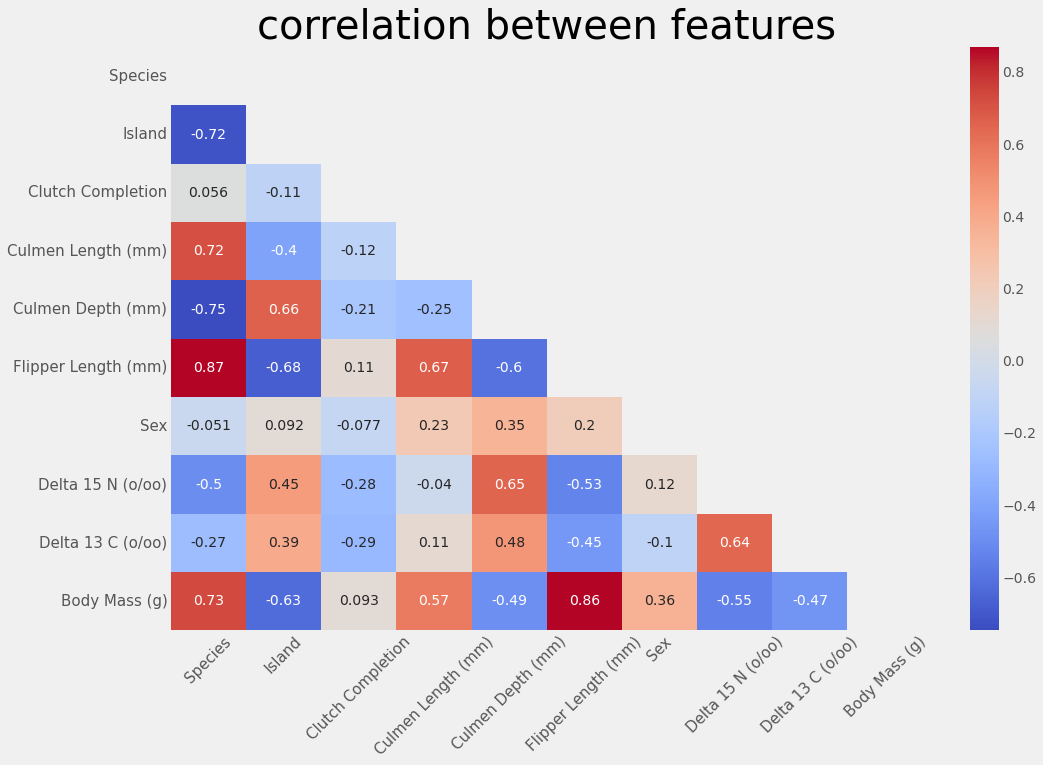

In [19]:
# ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑùÎèÑ 

plt.figure(figsize=(15,10))

heat_table = corr_df.corr()
mask = np.zeros_like(heat_table) # Ïñ¥Îñ§ Î≥ÄÏàòÎßåÌÅºÏùò ÏÇ¨Ïù¥Ï¶àÏù∏ 0 ÏúºÎ°ú Í∞ÄÎìù Ï∞¨ ArrayÎ•º Î∞∞Ï∂úÌïúÎã§.
mask[np.triu_indices_from(mask)]= True
heatmap_ax = sns.heatmap(heat_table, annot=True, mask = mask, cmap='coolwarm')
heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=15, rotation=45)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=15)
plt.title('correlation between features', fontsize=40)
plt.show()


# target featureÏù∏ Body Mass (g) Îäî Flipper Length (mm)ÏôÄ Í∞ÄÏû• ÎÜíÏùÄ ÏÉÅÍ¥Ä(0.87)
# Species, Island, Culmen Length (mm), Delta 15 N (o/oo) ÏôÄÎèÑ ÎÜíÏùÄ ÏÉÅÍ¥ÄÏùÑ Î≥¥ÏûÑ

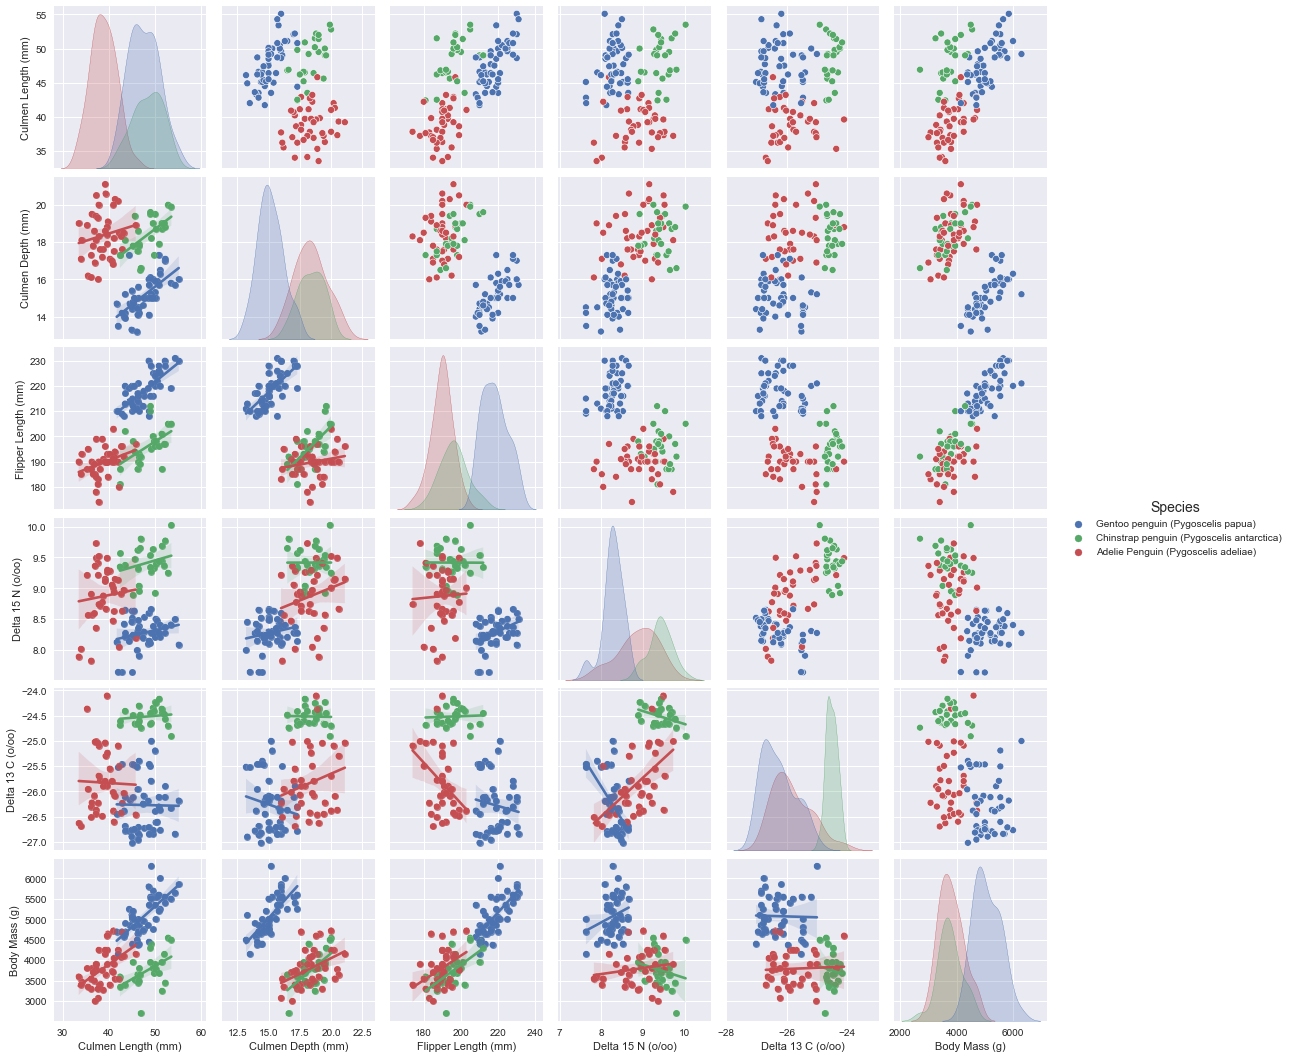

In [20]:
plt.style.use('seaborn')
g= sns.pairplot(df_train,hue='Species')
g.map_lower(sns.regplot);

In [21]:
target = "Body Mass (g)"

#### target Í≥º ÏàòÏπòÌòï featureÏùò Í¥ÄÍ≥Ñ 

In [22]:
# Í≤ΩÍ≥†Î¨¥Ïãú 
import warnings
warnings.filterwarnings("ignore")

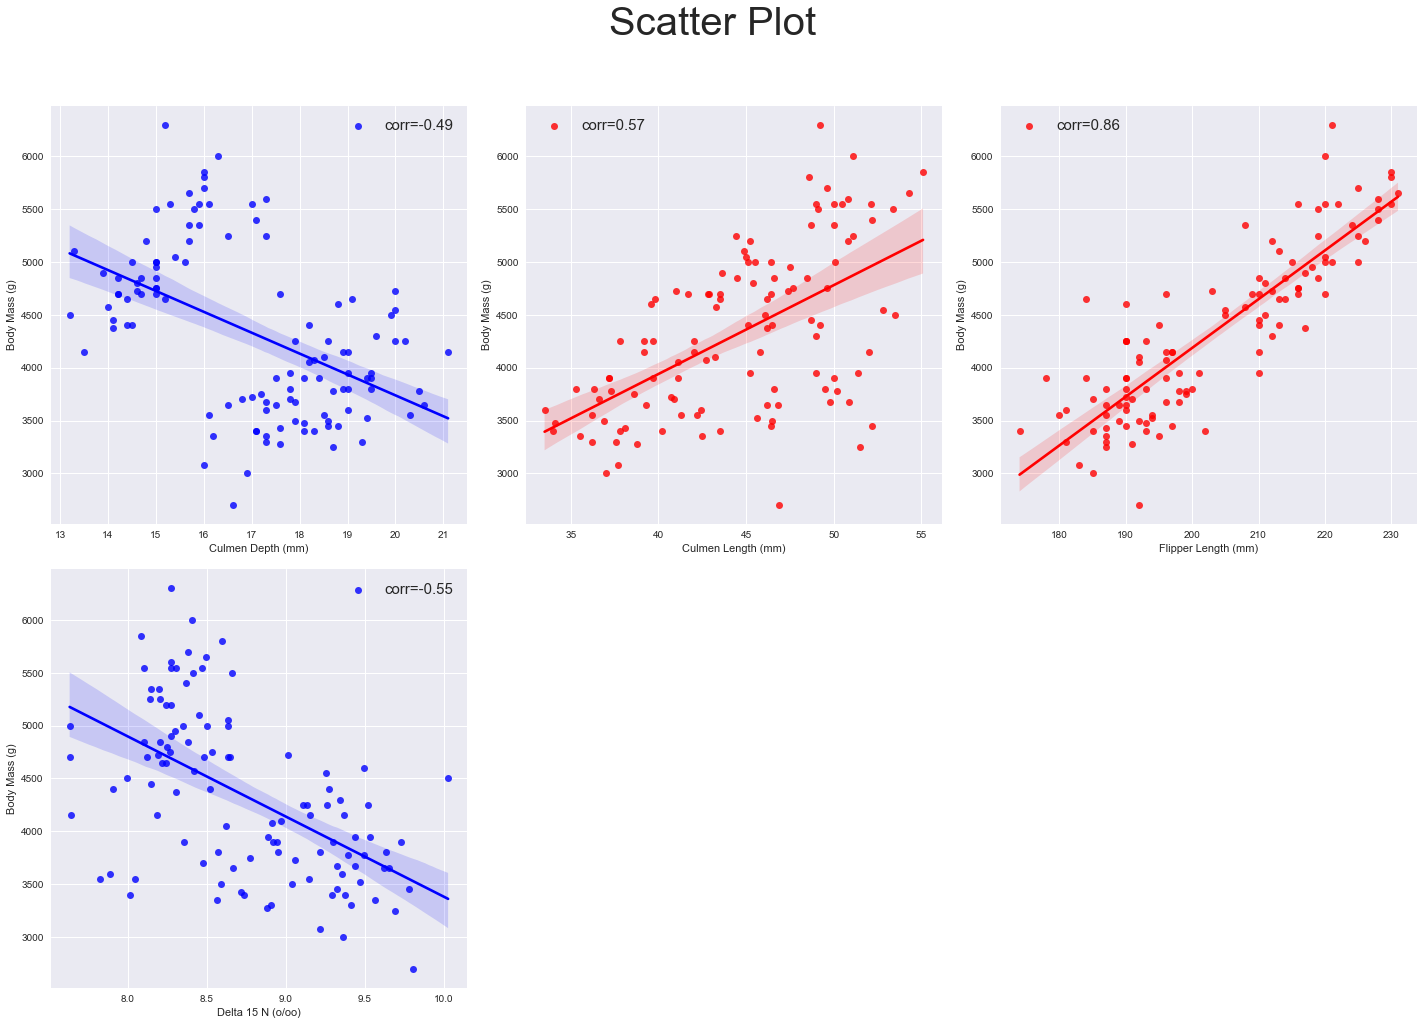

In [23]:
feature = numerical_feature

plt.figure(figsize=(20,15))
plt.suptitle("Scatter Plot", fontsize = 40)

for i in range(len(feature[:-1])):
    plt.subplot(2,3,i+1)
    plt.xlabel(feature[i])
    plt.ylabel(target)
    corr_score = df_train[[feature[i],target]].corr().iloc[0,1].round(2)
    c = 'red' if corr_score > 0 else 'blue'
    sns.regplot(df_train[feature[i]],df_train[target], color=c, label=f"corr={corr_score}")
    plt.legend(fontsize=15)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#### targetÍ≥º Ïπ¥ÌÖåÍ≥†Î¶¨Ìòï featureÏùò Í¥ÄÍ≥Ñ

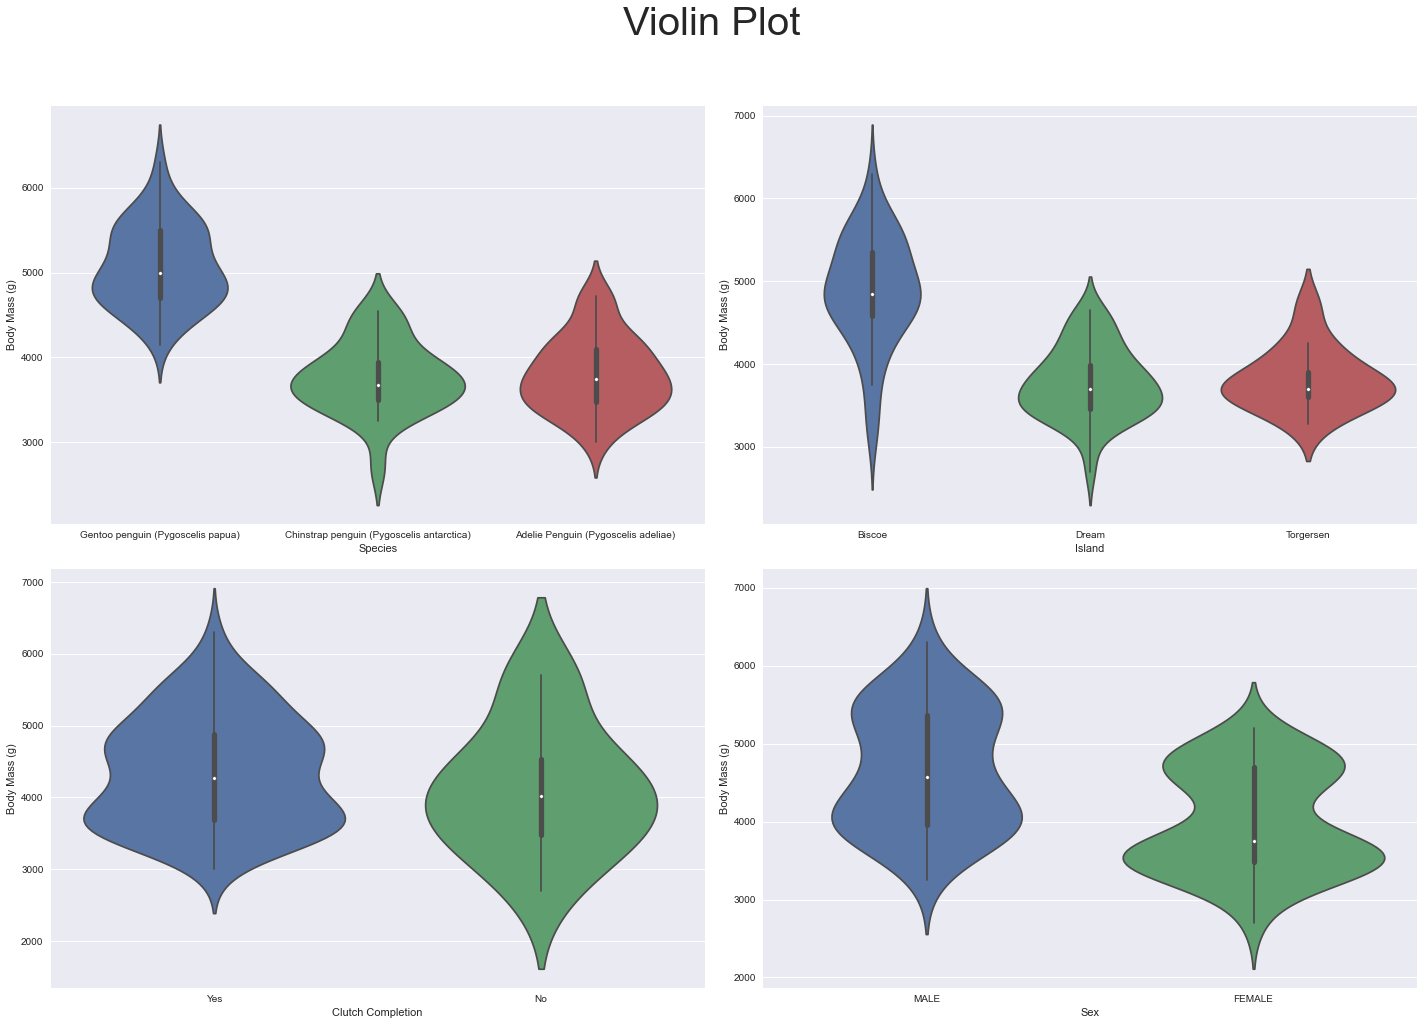

In [24]:
feature = categorical_feature

plt.figure(figsize=(20,15))
plt.suptitle("Violin Plot", fontsize=40)

# idÎäî Ï†úÏô∏, violinplot 
for i in range(len(feature)):
    plt.subplot(2,2,i+1)
    plt.xlabel(feature[i])
    plt.ylabel(target)
    sns.violinplot(x= df_train[feature[i]], y= df_train[target])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Preprocessing

In [25]:
# Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ 
df_train.fillna(df_train.mean(), inplace=True)
df_test.fillna(df_test.mean(), inplace=True)

# Ïù¥ÏÇ∞Ìòï Î≥ÄÏàò(numerical)ÏùÑ one-hot encoding 
train = pd.get_dummies(df_train)
test = pd.get_dummies(df_test)

print(train.shape)
print(test.shape)

(114, 16)
(228, 15)


#### Modeling

In [26]:
#Standard Scaler
#Î≥ÄÏàòÍ∞Ñ Ïä§ÏºÄÏùºÏùÑ ÎßûÏ∂∞Ï£ºÍ∏∞ ÏúÑÌï¥ StandardScalerÎ•º ÏÇ¨Ïö©

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

train_scaler=ss.fit_transform(train[numerical_feature])
train[numerical_feature] = pd.DataFrame(data=train_scaler, columns=numerical_feature)

test_scaler= ss.transform(test[numerical_feature])
test[numerical_feature] = pd.DataFrame(data=test_scaler, columns=numerical_feature)

In [27]:
# Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏ 

train[numerical_feature].head()

Culmen Depth (mm)  Culmen Length (mm)  Flipper Length (mm)  \
0          -0.887255            1.016685             1.161653   
1           1.027037            0.922318            -0.209242   
2          -1.352893            0.091884             0.476205   
3          -1.197680           -0.021357             0.750384   
4          -0.525091            0.941191             1.504376   

   Delta 15 N (o/oo)  Delta 13 C (o/oo)  
0          -0.775548           0.630951  
1           1.601553           1.629486  
2          -0.391149          -1.533908  
3          -0.962206          -0.523568  
4          -0.635514          -1.325731

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge,BayesianRidge

In [29]:
# train, test ÎÇòÎàÑÍ∏∞ (Validation)

X=train.drop(['Body Mass (g)'],axis=1)
y= train['Body Mass (g)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [30]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

alphas = [0,0.01,0.1,1,10,100]

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    
    neg_mse_scores = cross_val_score(ridge, X, y, scoring = 'neg_mean_squared_error', cv = 5)
    avg_rmse = np.mean(np.sqrt(-neg_mse_scores))
    print('alpha Í∞í ', alpha, 'ÏùºÎïå ÌèâÍ∑† rmse :', np.round(avg_rmse,4))

alpha Í∞í  0 ÏùºÎïå ÌèâÍ∑† rmse : 339.5967
alpha Í∞í  0.01 ÏùºÎïå ÌèâÍ∑† rmse : 339.3464
alpha Í∞í  0.1 ÏùºÎïå ÌèâÍ∑† rmse : 337.4481
alpha Í∞í  1 ÏùºÎïå ÌèâÍ∑† rmse : 330.4727
alpha Í∞í  10 ÏùºÎïå ÌèâÍ∑† rmse : 329.2807
alpha Í∞í  100 ÏùºÎïå ÌèâÍ∑† rmse : 405.4389


In [31]:
#Ridge

ridge = Ridge(alpha=0.01)
ridge.fit(X_train,y_train)
pred= ridge.predict(X_test)
print(ridge.score(X_test,y_test))

0.8242200622853957


#### Evaluation

In [32]:
import numpy as np

def RMSE(true, pred):
    score = np.sqrt(np.mean(np.square(true-pred)))
    return score

RMSE(y_test,pred)

316.0013886254281

#### Îã§Î•∏ Î∞©Î≤ï

In [ ]:
# Í≤∞Ï∏°Ïπò  column Ï∂îÏ∂ú ÌïòÎäî Ìï®Ïàò 

def check_missing_col(dataframe):
    missing_col = []
    counted_missing_col = 0
    for i, col in enumerate(dataframe.columns):
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            counted_missing_col += 1
            print(f'Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî Ïª¨ÎüºÏùÄ: {col}ÏûÖÎãàÎã§')
            print(f'Ìï¥Îãπ Ïª¨ÎüºÏóê Ï¥ù {missing_values}Í∞úÏùò Í≤∞Ï∏°ÏπòÍ∞Ä Ï°¥Ïû¨Ìï©ÎãàÎã§.')
            missing_col.append([col, dataframe[col].dtype])
    if counted_missing_col == 0:
        print('Í≤∞Ï∏°ÏπòÍ∞Ä Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏäµÎãàÎã§')
    return missing_col

In [ ]:
# Í≤∞Ï∏°Ïπò ÌôïÏù∏ 
missing_col = check_missing_col(df_train)

In [ ]:
# Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ÌïòÎäî Ìï®Ïàò (Ïπ¥ÌÖåÍ≥†Î¶¨Ìòï Îç∞Ïù¥ÌÑ∞ Ìñâ ÏÇ≠Ï†ú, ÏàòÏπòÌòï Îç∞Ïù¥ÌÑ∞Îäî ÌèâÍ∑†Í∞í)
def handle_na(data, missing_col):
    temp = data.copy()
    for col, dtype in missing_col:
        if dtype == 'O':
            # Ïπ¥ÌÖåÍ≥†Î¶¨Ìòï featureÍ∞Ä Í≤∞Ï∏°ÏπòÏù∏ Í≤ΩÏö∞ Ìï¥Îãπ ÌñâÎì§ÏùÑ ÏÇ≠Ï†úÌï¥ Ï£ºÏóàÏäµÎãàÎã§.
            temp = temp.dropna(subset=[col])
        elif dtype == int or dtype == float:
            # ÏàòÏπòÌòï featureÍ∞Ä Í≤∞Ï∏°ÏπòÏù∏ Í≤ΩÏö∞ ÌèâÍ∑†Í∞íÏùÑ Ï±ÑÏõåÏ£ºÏóàÏäµÎãàÎã§.
            temp.loc[:,col] = temp[col].fillna(temp[col].mean())
    return temp


df_train = handle_na(df_train, missing_col)

In [ ]:
# ÏàòÏπòÌòï Í≥º Ïπ¥ÌÖåÍ≥†Î¶¨Ìòï Î∂ÑÎ¶¨ 
numeric_feature = df_train.columns[(df_train.dtypes==int) | (df_train.dtypes== float)]
categorical_feature = df_train.columns[df_train.dtypes=='O']

print("ÏàòÏπòÌòï Îç∞Ïù¥ÌÑ∞Îäî Îã§ÏùåÍ≥º Í∞ôÏäµÎãàÎã§. \n", list(numeric_feature))
print("Ïπ¥ÌÖåÍ≥†Î¶¨Ìòï Îç∞Ïù¥ÌÑ∞Îäî Îã§ÏùåÍ≥º Í∞ôÏäµÎãàÎã§. \n", list(categorical_feature))